In [2]:
from lyricsgenius import Genius
import pandas as pd


In [5]:
token = "vq-3P0pd8mdh_iTuSXqtnIv-uIxWYtjAhxm6ACPDP3z6-AVI_8JPWy_YhZGyRe0j"
genius = Genius(token)
url = "https://github.com/CultureAsData-UIUC/is310-fall-2024-group-3/raw/refs/heads/main/data%20sets/Billboard_Hot100_Songs_Spotify_1946-2022.csv"
df = pd.read_csv(url)


In [19]:
title = df.loc[0]["Song"]
df['Lyrics'] = ''
for index, row in df.head(3).iterrows():
    title = row["Song"]
    song = genius.search_song(title)
    df.at[index, "Lyrics"] = song.lyrics


Searching for "Prisoner of Love - Remastered - 1992"...
Done.
Searching for "To Each His Own"...
Done.
Searching for "The Gypsy"...
Done.


In [24]:
print(df.head(3)['Lyrics'])
new_df = df.head(3)

0    1 ContributorPrisoner of love - 1999 remastere...
1    11 ContributorsTo Each His Own Lyrics[Intro]\n...
2    5 ContributorsThe Gypsy LyricsIn a quaint cara...
Name: Lyrics, dtype: object


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6879 entries, 0 to 6878
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 6879 non-null   object 
 1   Album                6879 non-null   object 
 2   Album Release Date   6879 non-null   object 
 3   Artist Names         6879 non-null   object 
 4   Artist(s) Genres     6879 non-null   object 
 5   Hot100 Ranking Year  6879 non-null   int64  
 6   Hot100 Rank          6879 non-null   int64  
 7   Song Length(ms)      6879 non-null   int64  
 8   Spotify Link         6879 non-null   object 
 9   Song Image           6879 non-null   object 
 10  Spotify URI          6879 non-null   object 
 11  Popularity           6879 non-null   int64  
 12  Acousticness         6879 non-null   float64
 13  Danceability         6879 non-null   float64
 14  Energy               6879 non-null   float64
 15  Instrumentalness     6879 non-null   f

In [25]:
new_df

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Lyrics
0,Prisoner of Love - Remastered - 1992,Today & Yesterday,1993-10-25,['Perry Como'],"['adult standards', 'easy listening']",1946,1,211866,https://open.spotify.com/track/6doXi6MzsJzr7t9...,https://i.scdn.co/image/ab67616d00001e02202774...,...,0.00209,0.167,-11.121,0.0328,80.064,0.185,2,1,4,1 ContributorPrisoner of love - 1999 remastere...
1,To Each His Own,The Best Of The Mercury Years,1996-01-01,['Eddy Howard'],['british dance band'],1946,2,184293,https://open.spotify.com/track/4xRdYnoXKNDPPrE...,https://i.scdn.co/image/ab67616d00001e02fd29e5...,...,0.00006,0.181,-16.766,0.0394,81.037,0.150,3,1,4,11 ContributorsTo Each His Own Lyrics[Intro]\n...
2,The Gypsy,The Anthology,1998-06-16,['The Ink Spots'],"['vocal harmony group', 'lounge']",1946,3,164533,https://open.spotify.com/track/4kuoSXnEyTKWypY...,https://i.scdn.co/image/ab67616d00001e02383811...,...,0.00000,0.103,-15.463,0.0552,76.056,0.222,7,1,4,5 ContributorsThe Gypsy LyricsIn a quaint cara...


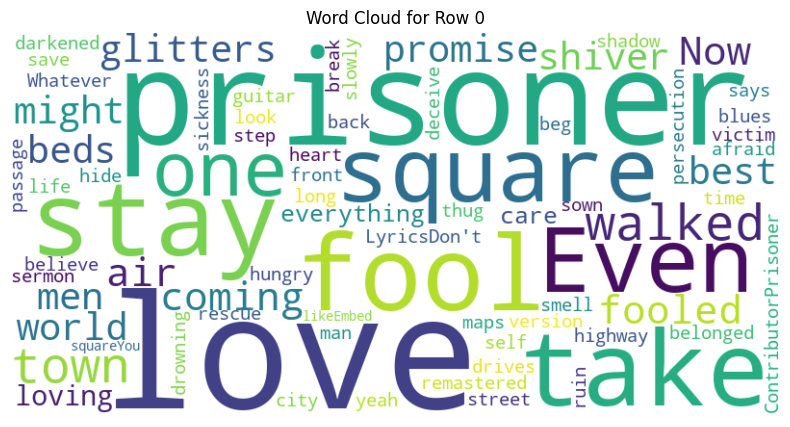

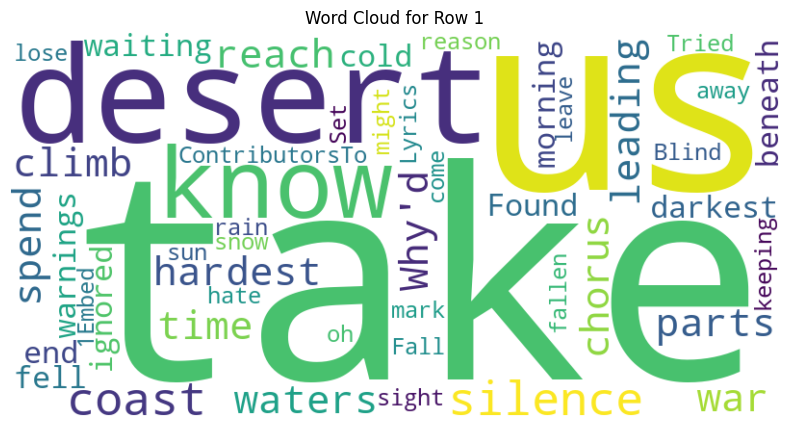

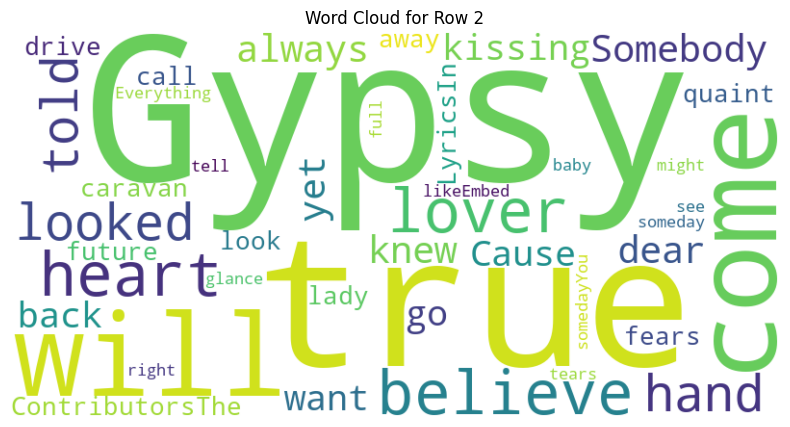

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

lyrics_text = ' '.join(new_df['Lyrics'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lyrics_text)

def clean_lyrics(text):
    return re.sub(r'\[.*?\]', '', text)

for index, row in new_df.iterrows():
    lyrics_text = clean_lyrics(row['Lyrics'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lyrics_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Row {index}")
    plt.axis('off')
    plt.show()


In [32]:
print(df.loc[1, "Lyrics"])

11 ContributorsTo Each His Own Lyrics[Intro]
Is that where we're at?

[Verse 1]
If we reach up as the waters climb in us
The hardest parts
Blind to reason, lose the sight of what's to come
Below or what's above
Fall in the rain, keeping the sun below us
Set away your hate

[Chorus]
And oh
Why'd you spend your time leading the chorus
When the war was just waiting before us?
As if you didn't know
You ignored all the darkest of warnings
Found our end in the silence of morning
It fell beneath the cold

[Post-Chorus]
I'll take the desert, you take the coast
But to each his own
I'll take the desert

[Verse 2]
If we reach up as the waters climb in us
The hardest parts of your silence
Tried to mark the fallen snow
We'll leave you here, you know?
You might also like[Chorus]
Why'd you spend your time leading the chorus
When the war was just waiting before us?
As if you didn't know
You ignored all the darkest of warnings
Found our end in the silence of morning
It fell beneath the cold

[Post-Chor